**Author:** *Priyadharsshini Sakrapani*

The dataset for this project was downloaded from Kaggle https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset and this contains information about the delivery done to customers.

**DeliveryPersonAge:** Age of the Delivery Person.

**DeliveryPersonRatings:** Ratings earned by the delivery person.

**Distance:** Distance travelled by the delivery person for the delivery in km.

**WeatherConditions:** WeatherCondition at time the delivery was attempted.

**RoadTrafficDensity:** Intensity of road traffic at the time of delivery.
                          _**SampleSpace:**_ High, Jam, Low, Medium

**VehicleCondition:** Vehicle condition of the vehicle used by the delivery person for delivery.

**TypeOfOrder:** Type of order placed. 
                   _**SampleSpace:**_ Snacks, Buffet, Drinks, Meal.

**TypeOfVehicle:** Type of vehcile used for the delivery by the delivery person. 
                     _**SampleSpace:**_ Motorcyle, Scooter.

**City:** The places where the delivery was made.
          _**SampleSpace:**_ Metropolitian, Urban, City
          
**Festival:** The order placed on a festival time or not.

**TimeTaken:** Time taken to deliver the order in minutes.

**OrderProcessDuration:** The time taken to process an order(from the time the order was received to the time the                               order was picked for delivery)in seconds.


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder 

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn'

# Importing the csv to jupiter notebook
df = pd.read_csv('FoodDelivery.csv')
df

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn'

# Importing the csv to jupiter notebook
df = pd.read_csv('FoodDelivery.csv')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


### AIM:
- To predict the 'TimeTaken' to deliver an order and the influence of the variables like 'Distance', 'WeatherCondition', 'DeliveryPersonAge' etc on this attribute.

## REASON TO USE EACH OF THE ATTRIBUTE

While there are several analysis that could be done with each of these attribute, in the initial analysis of this project we have used each of the following variables for the following purposes:

***
<font size="3"><b><ins>DeliveryPersonAge:</ins></b></font>

- Understand the spread of age in the following dataset.
- Understand the influence of age on the distance travelled per minute by a delivery person.
***
<font size="3"><b><ins>DeliveryPersonRatings:</ins></b></font>

- To rate an individual based on their performance. The example in the project uses this attribute to filter the top 5 Delivery person between the ages 20 and 30 based on their ratings.
***
<font size="3"><b><ins>Distance:</ins></b></font>

- Understand the influence of age on the distance travelled per minute by a delivery person. 
***
<font size="3"><b><ins>Weatherconditions:</ins></b></font>

- Used this attribute to understand the effect of weather on the timetaken to deliver the order in the plot.
***
<font size="3"><b><ins>RoadTrafficDensity:</ins></b></font>

- Used this attribute to understand the effect of RoadTrafficDensity on the timetaken to deliver the order in the plot. 
***
<font size="3"><b><ins>VehicleCondition:</ins></b></font>

- Used this attribute to understand the effect of VehicleCondition on the timetaken to deliver the order in the plot.
***
<font size="3"><b><ins>TypeOfOrder:</ins></b></font>

This attribute could be used for the following 
- To understand the most popular and the least popular order type.
- To understand if other factors like Weatherconditions, City have an effect on the customer's perferance of order.

**Plots/Examples used with this attribute:**
- Used this attribute to understand the proportion of the 'TypeOfOrder'.
***
<font size="3"><b><ins>TypeOfVehicle:</ins></b></font>

- Used this attribute to understand the effect of TypeOfVehicle on the timetaken to deliver the order in the plot.
***
<font size="3"><b><ins>City:</ins></b></font>

This attribute could be used for the following 
- To understand the demographic effect on the TypeOfOrder and the NumberOfOrder placed. 
- To understand and group the time taken to deliver an order and the time taken to process an order citywise.
***
<font size="3"><b><ins>Festival:</ins></b></font>

This attribute could be used for the following 
- To understand the number of orders placed during a festive time.
***
<font size="3"><b><ins>TimeTaken:</ins></b></font>

- Used this attribute to understand the effect of WeatherConditions and RoadTrafficIntensity on TimeTaken on plots.
***
<font size="3"><b><ins>OrderProcessDuration:</ins></b></font>

- Used this attribute to understand time taken to process an order.

In [108]:
# With the Latitude and the longitude values from Restaurant and the delivery location, we are calculating the distance 
# to visualize the data more effectively using the following formula.
df["Distance"] = 6371 * 2* np.arcsin(np.sqrt(np.sin((df['Delivery_location_latitude'] - df['Restaurant_latitude'])/2.0)**2 + \
        np.cos(df['Restaurant_latitude']) * np.cos(df['Delivery_location_latitude']) * np.sin((df['Delivery_location_longitude'] - df['Restaurant_longitude'])/2.0)**2))

df["Distance"] = 1.609344*df["Distance"]
# Dropping the following columns after calculating the distance.
df = df.drop(columns=['ID', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Delivery_person_ID']) 

# Renaming the variables as the variable in the datatset donot follow the same naming convention
df = df.rename(columns={'Time_taken(min)': 'TimeTaken'})
df = df.rename(columns={'multiple_deliveries':'MultipleDeliveries'})
df = df.rename(columns={'Delivery_person_Age':'DeliveryPersonAge'})
df = df.rename(columns={'Delivery_person_Ratings':'DeliveryPersonRatings'})
df = df.rename(columns={'Order_Date':'OrderDate'})
df = df.rename(columns={'Time_Orderd':'TimeOrderd'})
df = df.rename(columns={'Time_Order_picked':'TimeOrderPicked'})
df = df.rename(columns={'Road_traffic_density':'RoadTrafficDensity'})
df = df.rename(columns={'Vehicle_condition':'VehicleCondition'})
df = df.rename(columns={'Type_of_order':'TypeOfOrder'})
df = df.rename(columns={'Type_of_vehicle':'TypeOfVehicle'})
df = df.rename(columns={'Type_of_vehicle':'TypeOfVehicle'})
df = df.rename(columns={'Weatherconditions':'WeatherConditions'})


# As the NaN values are hardcoded as string in dataset, we are replacing the 'NaN' string with the numpy defined NaN.
df = df.replace("NaN", np.nan, regex=True)
df = df.replace("nan", np.nan, regex=True)

df

# Stripping 'min' that is attached to the data to facilitate better redability and calculation
df['TimeTaken'] = df['TimeTaken'].map(lambda x: x.lstrip('(min)'))
df['WeatherConditions'] = df['WeatherConditions'].astype(str).str.replace('conditions','')
df['City'] = df['City'].astype(str).str.replace(' ','')


df['TimeTaken'] = df['TimeTaken'].astype(int)
df['RoadTrafficDensity'] = df['RoadTrafficDensity'].astype(str)


# Rearrange the columns
df = df[['DeliveryPersonAge', 'DeliveryPersonRatings', 'Distance', 'OrderDate', 'TimeOrderd', 'TimeOrderPicked', 'WeatherConditions', 'RoadTrafficDensity', 'VehicleCondition', 'TypeOfOrder', 'TypeOfVehicle', 'City', 'Festival', 'TimeTaken']]


# Changing the data type
df['DeliveryPersonAge'] = df['DeliveryPersonAge'].astype(float)
df['DeliveryPersonRatings'] = df['DeliveryPersonRatings'].astype(float)
df

# Calculate the duration to process order
df['TimeOrderd'] = pd.to_datetime(df['TimeOrderd'])
df['TimeOrderPicked'] = pd.to_datetime(df['TimeOrderPicked'])
df['OrderProcessDuration'] = df['TimeOrderPicked'] - df['TimeOrderd']
df['OrderProcessDuration'] = df['OrderProcessDuration'].astype(str)

df['OrderProcessDuration'] = df['OrderProcessDuration'].str.replace('[0-9] days', '', regex=True)
df['OrderProcessDuration'] = df['OrderProcessDuration'].str.replace(':', '', regex=True)
df['OrderProcessDuration'] = df['OrderProcessDuration'].str.replace('\W', '', regex=True)
df['OrderProcessDuration'] = df['OrderProcessDuration'].map(lambda x: x.lstrip('(0)'))
df = df.drop(columns=['TimeOrderd', 'TimeOrderPicked', 'OrderDate'])

# we will use the clean DF to create models
df = df.replace("nan", np.nan, regex=True)
rows_to_fix_pima = df[df.isna().any(axis=1)].copy()
clean_df = df.dropna()
clean_df

clean_df = clean_df[pd.notnull(clean_df['OrderProcessDuration'])]
clean_df['OrderProcessDuration'] = clean_df['OrderProcessDuration'].astype(int)

df['OrderProcessDuration'] = clean_df['OrderProcessDuration']
df = clean_df[pd.notnull(df['OrderProcessDuration'])]
clean_df


,DeliveryPersonAge,DeliveryPersonRatings,Distance,WeatherConditions,RoadTrafficDensity,VehicleCondition,TypeOfOrder,TypeOfVehicle,City,Festival,TimeTaken,OrderProcessDuration
0,37.0,4.9,252.936030,Sunny,High,2,Snack,motorcycle,Urban,No,24,1500
1,34.0,4.5,1806.979723,Stormy,Jam,2,Snack,scooter,Metropolitian,No,33,500
2,23.0,4.4,140.604015,Sandstorms,Low,0,Drinks,motorcycle,Urban,No,26,1500
3,38.0,4.7,512.777014,Sunny,Medium,0,Buffet,motorcycle,Metropolitian,No,21,1000
4,32.0,4.6,554.613624,Cloudy,High,1,Snack,scooter,Metropolitian,No,30,1500
...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,104.608775,Windy,High,1,Meal,motorcycle,Metropolitian,No,32,1000
45589,21.0,4.6,1014.593330,Windy,Jam,0,Buffet,motorcycle,Metropolitian,No,36,1500
45590,30.0,4.9,411.986292,Cloudy,Low,1,Drinks,scooter,Metropolitian,No,16,1500
45591,20.0,4.7,410.183717,Cloudy,High,0,Snack,motorcycle,Metropolitian,No,26,500


<h2>VARIABLE DISTRIBUTION AND DISCUSSION</h2>


<AxesSubplot:title={'center':'TimeTaken'}, ylabel='Density'>

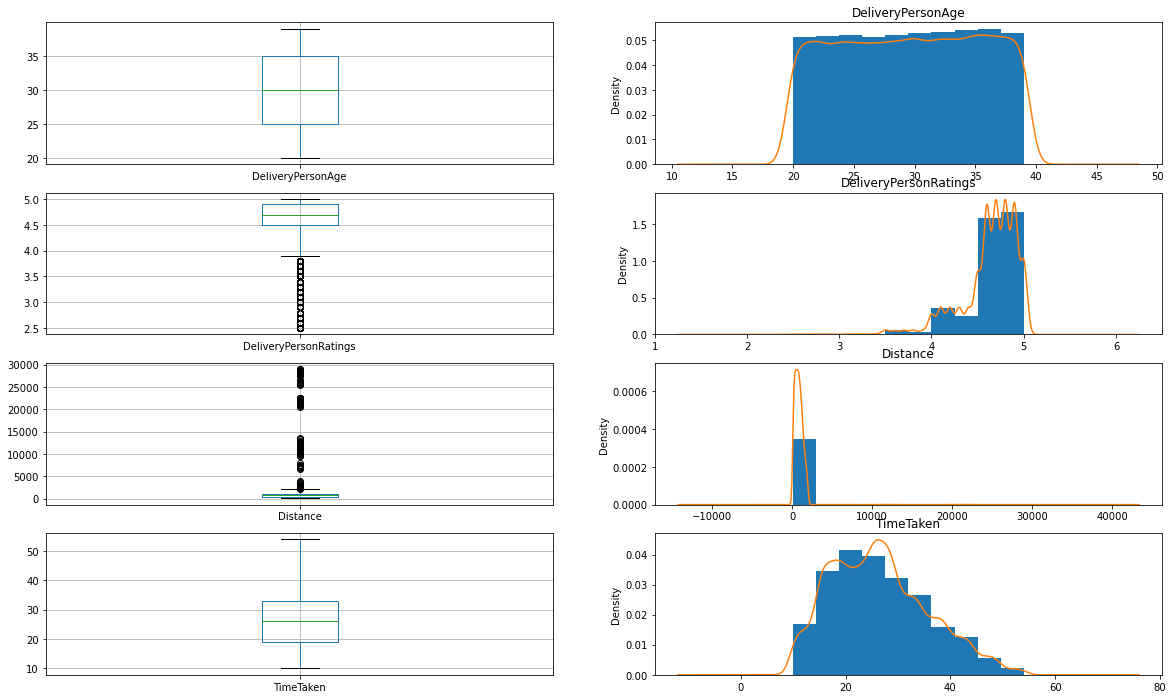

In [109]:
fig,axs=plt.subplots(4,2, figsize=(20, 12))
df.boxplot('DeliveryPersonAge',ax=axs[0][0])
df['DeliveryPersonAge'].hist(ax=axs[0][1], density=True) # normalizes the density
df['DeliveryPersonAge'].plot.density(ax=axs[0][1], title="DeliveryPersonAge")

df.boxplot('DeliveryPersonRatings',ax=axs[1][0])
df['DeliveryPersonRatings'].hist(ax=axs[1][1], density=True) # normalizes the density
df['DeliveryPersonRatings'].plot.density(ax=axs[1][1], title="DeliveryPersonRatings")

df.boxplot('Distance',ax=axs[2][0])
df['Distance'].hist(ax=axs[2][1], density=True) # normalizes the density
df['Distance'].plot.density(ax=axs[2][1], title="Distance")


df.boxplot('TimeTaken',ax=axs[3][0])
df['TimeTaken'].hist(ax=axs[3][1], density=True) # normalizes the density
df['TimeTaken'].plot.density(ax=axs[3][1], title="TimeTaken")

<b>The above plots are done for all the continuous data present in our dataset.</b>
<br>
<b>DeliveryPersonAge:</b> From the density plot, it can be seen that this attribute has multimodal distribution with several peaks. Also, the box plot confirms that there is no outlier present in this attribute. This attribute shows close to normal distubution and it is not skewed with a skew value close to '0.018' which is close to a gaussian model.
<br>
<b>DeliveryPersonRatings:</b> This attribute is heavily negatively skewed and the box plot confirms the presence of many outliers. The variance of the attribute is also very less which hints that the data is distributed more towards a specific range.
<br>
<b>Distance:</b> This attribute has excessive outliers and also it is heavily positely skewed with a skew value of about 11.43. This attribute requires cleaning and the density plot hints that it has a unimodal distribution, although clear understanding can be got after the outlier removal.
<br>
<b>TimeTaken:</b> This attribute is also positively skewed and has no Gaussian distribution. This attribute has a descent variance, which specifies a descent spread. Also the box plot confirms the presence of outliers.

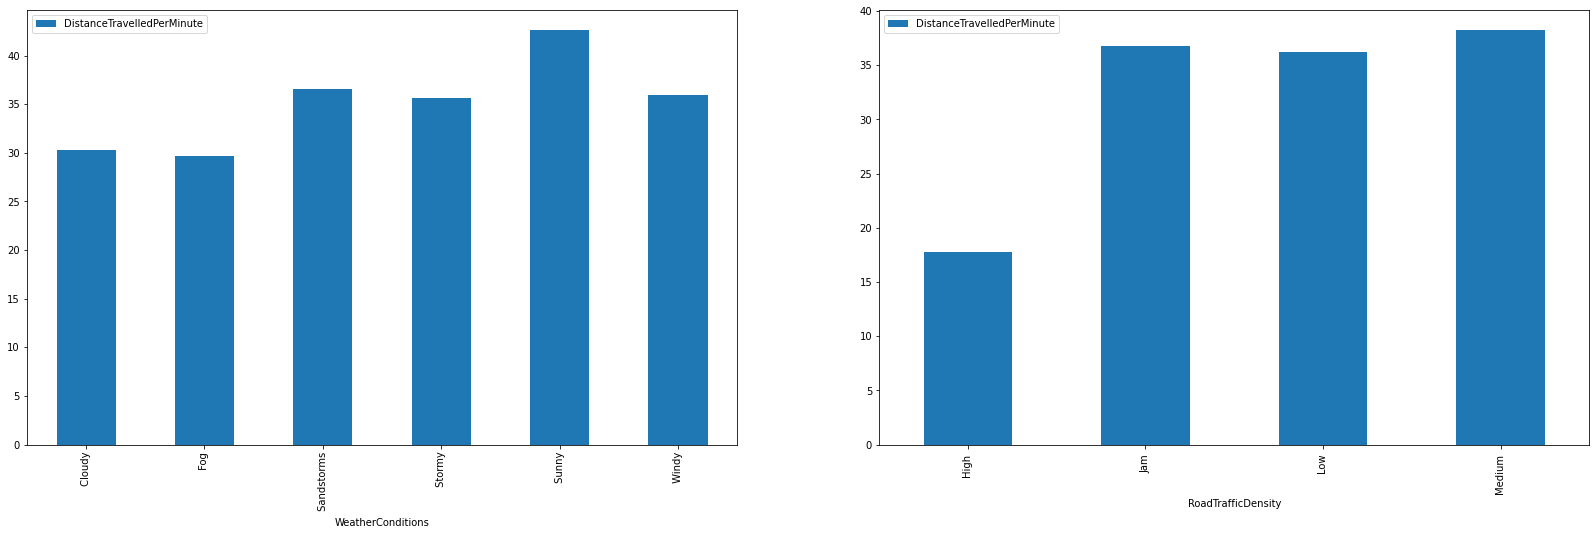

In [137]:
# This plot has been made to understand the effect of 'WeatherConditions' and 'RoadTrafficDensity' on 'TimeTaken' to 
# deliver an order. 

# We are calculating the DistanceTravelledPerMinute for easier visualisation.

fig, axs = plt.subplots(1,2, figsize=(28,8))
df['DistanceTravelledPerMinute'] = df['Distance']/df['TimeTaken']
agg_dict = {'DistanceTravelledPerMinute': 'mean'}
avg_cons = df.groupby(['WeatherConditions']).agg(agg_dict).plot.bar(ax=axs[0], label='TimeTaken', legend=True)
avg_cons = df.groupby(['RoadTrafficDensity']).agg(agg_dict).plot.bar(ax=axs[1], label='RoadTrafficDensity', legend=True)


- From the above bar graph, it is seen that the 'DistanceTravelledPerMinute' is considerably higher when the weather is Sunny and the least when it is cloudy and foggy.
- Similary as expected in the second graph, the individual is able to cover shorter distance when the traffic is high while a considerable distance is covered during other times.

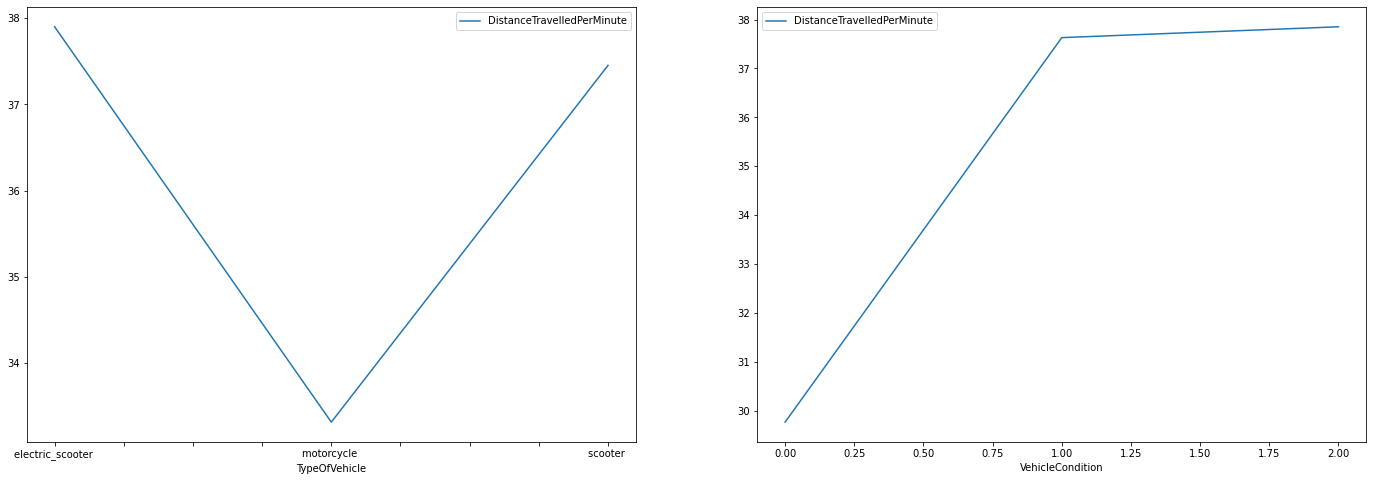

In [138]:
# This plot has been made to understand the effect of 'TypeOfVehicle' and 'VehicleCondition' on 'TimeTaken' to 
# deliver order.

fig, axs = plt.subplots(1,2, figsize=(24,8))
agg_dict = {'DistanceTravelledPerMinute': 'mean'}
avg_cons = df.groupby(['TypeOfVehicle']).agg(agg_dict).plot.line(ax=axs[0], label='TypeOfVehicle', legend=True)
avg_cons = df.groupby(['VehicleCondition']).agg(agg_dict).plot.line(ax=axs[1], label='VehicleCondition', legend=True)

- The plot shows that the delivery person was able to cover more distance when he travelled by electric_scooter and scooter, compared to motorcycle and the least with Bicycle.

In [139]:
# Listing the Top 5 Delivery Person whose age is between 20 and 30
df.loc[(df['DeliveryPersonAge'] >= 20) & (df['DeliveryPersonAge'] <= 30)].sort_values(by='DeliveryPersonRatings', ascending = False).head(5)


,DeliveryPersonAge,DeliveryPersonRatings,Distance,WeatherConditions,RoadTrafficDensity,VehicleCondition,TypeOfOrder,TypeOfVehicle,City,Festival,TimeTaken,OrderProcessDuration,DistanceTravelledPerMinute
20089,20.0,5.0,254.525127,Fog,Low,1,Buffet,scooter,Metropolitian,No,18,500,14.140285
19533,21.0,5.0,140.008049,Stormy,Low,1,Meal,scooter,Metropolitian,No,15,1500,9.333870
19647,21.0,5.0,512.867561,Fog,Jam,2,Snack,motorcycle,Metropolitian,No,32,1000,16.027111
43068,27.0,5.0,804.533710,Stormy,Jam,1,Buffet,motorcycle,Metropolitian,No,28,1500,28.733347
19626,23.0,5.0,312.872440,Fog,Jam,1,Meal,motorcycle,Metropolitian,No,27,500,11.587868


## NaN VALUES IDENTIFICATION AND INDUCING OF NaN VALUES

In [110]:
df = df.dropna()
pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
pd.DataFrame({'Null Values' : clean_df.isna().sum(), 'Percentage Null Values' : (clean_df.isna().sum()) / (clean_df.shape[0]) * (100)})

,Null Values,Percentage Null Values
DeliveryPersonAge,0,0.0
DeliveryPersonRatings,0,0.0
Distance,0,0.0
WeatherConditions,0,0.0
RoadTrafficDensity,0,0.0
VehicleCondition,0,0.0
TypeOfOrder,0,0.0
TypeOfVehicle,0,0.0
City,0,0.0
Festival,0,0.0


In [111]:
# Inducing null values in selected attributes to make the percentage between 10 and 20
df.loc[df.sample(int(len(df) * .15)).index, 'DeliveryPersonAge'] = None
df.loc[df.sample(int(len(df) * .20)).index, 'Distance'] = None

In [112]:
# Recalculating the Null value percentage of each attribute after inducing null values in the previous step.
pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})


,Null Values,Percentage Null Values
DeliveryPersonAge,6339,15.0
DeliveryPersonRatings,0,0.0
Distance,8452,20.0
WeatherConditions,0,0.0
RoadTrafficDensity,0,0.0
VehicleCondition,0,0.0
TypeOfOrder,0,0.0
TypeOfVehicle,0,0.0
City,0,0.0
Festival,0,0.0


## OUTLIER IDENTIFICATION AND CLEANING (OUTDATED- ITERATION 1)

In [143]:


# df.describe()

#### Initial Assessment
# - The Attribute 'Distance' has a very high standard deviation, so there is a chance that this field may have a lot of extreme values or outliers.
# - On an average, the DeliveryPersonRatings is 4.6
# - The max value of 'Distance' also indicates the presence of extreme values or outliers.

#### OUTLIER IDENTIFICATION AND CLEANING FOR THE ATTRIBUTE 'DISTANCE'

# # defining the min & max boundries of the data
# low = 0.05
# high = 0.95

# # retriving the boundry values 
# df["Distance"].quantile([low,high])

# # Calculating the % of outliers in the Distance column
# print("Percentage of outliers present in the Distance Attribute:")
# print((df[df["Distance"] < 138.137327]["DeliveryPersonID"].count() + df[df["Distance"] > 1714.371163]["DeliveryPersonID"].count())*100/df.shape[0])


# # Removing outliers

# columns = ["Distance"]
# Q1 = df[columns].quantile(0.25)
# Q3 = df[columns].quantile(0.75)
# IQR = Q3 - Q1

# lowqe_bound=Q1 - 1.5 * IQR
# upper_bound=Q3 + 1.5 * IQR

# df = df[~((df[columns] < lowqe_bound) |(df[columns] > upper_bound)).any(axis=1)]

#### OUTLIER IDENTIFICATION AND CLEANING FOR THE ATTRIBUTE 'TIMETAKEN'

# # Print the Skewness value of the variable 'TimeTaken'
# print("The skewness values of - TimeTaken is")
# print(df['TimeTaken'].skew())
# df['TimeTaken'].describe()

# # Visualising the outlier in attribute 'TimeTaken'
# print("Box plot to visualise the outliers in the attribute 'TimeTaken'")
# plt.boxplot(df["TimeTaken"])
# plt.show()

# # we will do the 10th percentile for the lower values and 90th percentile for the higher values. 
# print(df['TimeTaken'].quantile(0.10))
# print(df['TimeTaken'].quantile(0.90))

# #Removing outliers and calculating skew value.
# df["TimeTaken"] = np.where(df["TimeTaken"] <15.0, 15.0,df['TimeTaken'])
# df["TimeTaken"] = np.where(df["TimeTaken"] >40.0, 40.0,df['TimeTaken'])
# print(df['TimeTaken'].skew())

# # Visualising the atrribute after removing the outliers
# plt.boxplot(df["TimeTaken"])
# plt.show()

<h2>REVISED OUTLIER IDENTIFICATION AND CLEANING</h2>

The boxplot shows that the following attributes have outliers.
- TimeTaken
- Distance
- DeliveryPersonRatings

The attribute <b>'DeliveryPersonRatings'</b>, the box plot considers ratings below 4 as outliers. However, in a real scenario, bad performance of the delivery person can reduce their ratings upto 0. Hence, in this project we are considering these values as extreme scenarios and not cleaning them. However, the value above 5 in an outlier as the maximum rating possible is 5. Hence using capping to remove values above 5. 

The attribute <b>'Distance'</b> shows the presence of lot of outliers in the upper range. Since this data is heavily skewed, it is not possible to remove the outliers with the 'Standard Deviation' method and using flooring/capping might not be the right way to proceed due to the lack of domain knowledge. Due to the presence of extreme outliers and heavy skew, IQR is the best method to remove outliers in this attribute. 

For the attribute <b>'TimeTaken'</b>, Since the outliers are present in the upper end, quantile based capping could be used to get rid of them.


In [113]:
clean_df = clean_df.loc[clean_df['DeliveryPersonRatings'] <= 5]

In [114]:
columns = ["Distance"]
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

clean_df = clean_df[~((clean_df[columns] < lowqe_bound) |(clean_df[columns] > upper_bound)).any(axis=1)]

In [115]:
clean_df["TimeTaken"] = np.where(clean_df["TimeTaken"] >clean_df['TimeTaken'].quantile(0.90), clean_df['TimeTaken'].quantile(0.90),clean_df['TimeTaken'])


<AxesSubplot:title={'center':'TimeTaken'}, ylabel='Density'>

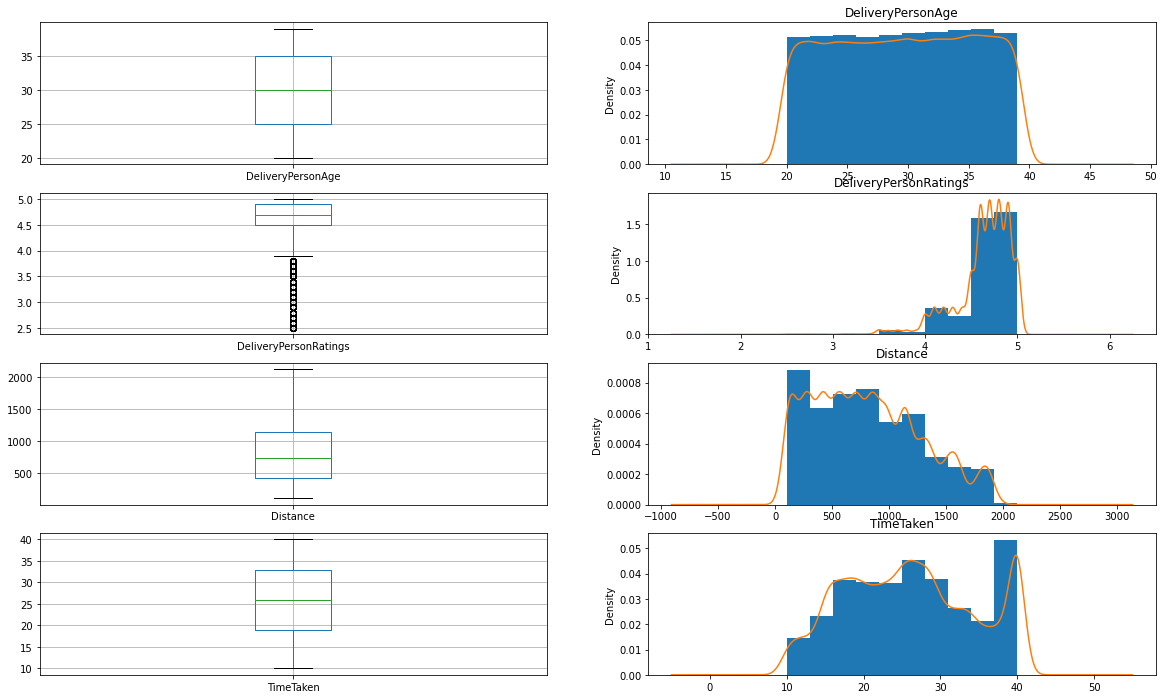

In [116]:
# Handling outliers 
# Creating a box plot for all continuous variables after removing outliers.
fig,axs=plt.subplots(4,2, figsize=(20, 12))

clean_df.boxplot('DeliveryPersonAge',ax=axs[0][0])
clean_df['DeliveryPersonAge'].hist(ax=axs[0][1], density=True) # normalizes the density
clean_df['DeliveryPersonAge'].plot.density(ax=axs[0][1], title="DeliveryPersonAge")

clean_df.boxplot('DeliveryPersonRatings',ax=axs[1][0])
clean_df['DeliveryPersonRatings'].hist(ax=axs[1][1], density=True) # normalizes the density
clean_df['DeliveryPersonRatings'].plot.density(ax=axs[1][1], title="DeliveryPersonRatings")

clean_df.boxplot('Distance',ax=axs[2][0])
clean_df['Distance'].hist(ax=axs[2][1], density=True) # normalizes the density
clean_df['Distance'].plot.density(ax=axs[2][1], title="Distance")


clean_df.boxplot('TimeTaken',ax=axs[3][0])
clean_df['TimeTaken'].hist(ax=axs[3][1], density=True) # normalizes the density
clean_df['TimeTaken'].plot.density(ax=axs[3][1], title="TimeTaken")

<h2>PROJECT ITERATION 2</h2>

<h1> ENCODING: </h1>
<h4>RoadTrafficDensity:</h4>Since the attribute has an order associated with that (High, Low, Medium and Jam) it would be most efficient to use 'Ordinal Endocing' to associate and maintain the order.
<h4>TypeOfVehicle and TypeOfOrder</h4> The frequency for few of the values in these attributes clashes, hence we cannot use 'frequency encoder' and secondly using 'one-hot encoding' increases the dataset as the sample space is more. Hence using 'Label encoder'.
<h4>City:</h4> Checking the frequency of the values, since there is no repitition, using 'frequency encoding'.
<h4>WeatherConditions:</h4> Since the sample space of this attribute is less, using one-hot encoding will not increase the size of the dataframe to a large extent, since there is overlap of frequency which rules out the possibility to use 'frequency encoding'. Hence using 'one-hot encoding'


In [117]:
# Finding if we can use frequency encoder for the attribute 'WeatherConditions' and 'TypeOfOrder'.

# enc_freq_weather = (clean_df.groupby('WeatherConditions').size()) / len(clean_df)
# enc_freq_weather

# enc_freq_order = (clean_df.groupby('TypeOfOrder').size()) / len(clean_df)
# enc_freq_order


# Encoding the features 'TypeOfVehicle' , 'TypeOfOrder' and 'Festival' using LabelEncoder
le = LabelEncoder()

# Encoding both the datasets we have, the one with the null values and outliers, while the 'clean_df' is the clean one without both.
clean_df['TypeOfVehicle'] = le.fit_transform(clean_df['TypeOfVehicle'])
clean_df['Festival'] = le.fit_transform(clean_df['Festival'])
clean_df['TypeOfOrder'] = le.fit_transform(clean_df['TypeOfOrder'])

df['TypeOfVehicle'] = le.fit_transform(df['TypeOfVehicle'])
df['Festival'] = le.fit_transform(df['Festival'])
df['TypeOfOrder'] = le.fit_transform(df['TypeOfOrder'])



# Using 'frequency encoder' for the attribute 'City' as there is no overlap in the attributes.
enc_freq_city = (clean_df.groupby('City').size()) / len(clean_df)
enc_freq_city
clean_df['City'] = clean_df['City'].apply(lambda x : enc_freq_city[x])


enc_freq_city = (df.groupby('City').size()) / len(df)
enc_freq_city
df['City'] = df['City'].apply(lambda x : enc_freq_city[x])


# Using One hot encoder for the attribute 'WeatherConditions'.
encoder = OneHotEncoder() 
df_ohe = clean_df.copy()
df_ohe_1 = df.copy()

cp = df_ohe.WeatherConditions.values
cp1 = df_ohe_1.WeatherConditions.values

df_ohe = pd.DataFrame(encoder.fit_transform(cp.reshape(-1,1)).toarray(),index=clean_df.index , columns=encoder.categories_[0])
clean_df.drop('WeatherConditions', axis=1, inplace=True)
clean_df = clean_df.join(df_ohe)
clean_df

df_ohe_1 = pd.DataFrame(encoder.fit_transform(cp1.reshape(-1,1)).toarray(),index=df.index , columns=encoder.categories_[0])
df.drop('WeatherConditions', axis=1, inplace=True)

df = df.join(df_ohe_1)
df


# Using Ordinal encoder for the attribute 'RoadTrafficDensity'
scale_mapper = {"Low ":1, "Medium ":2, "High ":3, "Jam ": 4}
clean_df["RoadTrafficDensity"] = clean_df["RoadTrafficDensity"].replace(scale_mapper)
df["RoadTrafficDensity"] = df["RoadTrafficDensity"].replace(scale_mapper)

clean_df


,DeliveryPersonAge,DeliveryPersonRatings,Distance,RoadTrafficDensity,VehicleCondition,TypeOfOrder,TypeOfVehicle,City,Festival,TimeTaken,OrderProcessDuration,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy
0,37.0,4.9,252.936030,3,2,3,1,0.227597,0,24.0,1500,0.0,0.0,0.0,0.0,1.0,0.0
1,34.0,4.5,1806.979723,4,2,3,2,0.768794,0,33.0,500,0.0,0.0,0.0,1.0,0.0,0.0
2,23.0,4.4,140.604015,1,0,1,1,0.227597,0,26.0,1500,0.0,0.0,1.0,0.0,0.0,0.0
3,38.0,4.7,512.777014,2,0,0,1,0.768794,0,21.0,1000,0.0,0.0,0.0,0.0,1.0,0.0
4,32.0,4.6,554.613624,3,1,3,2,0.768794,0,30.0,1500,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,104.608775,3,1,2,1,0.768794,0,32.0,1000,0.0,0.0,0.0,0.0,0.0,1.0
45589,21.0,4.6,1014.593330,4,0,0,1,0.768794,0,36.0,1500,0.0,0.0,0.0,0.0,0.0,1.0
45590,30.0,4.9,411.986292,1,1,1,2,0.768794,0,16.0,1500,1.0,0.0,0.0,0.0,0.0,0.0
45591,20.0,4.7,410.183717,3,0,3,1,0.768794,0,26.0,500,1.0,0.0,0.0,0.0,0.0,0.0


<h2>SCALING:</h2>

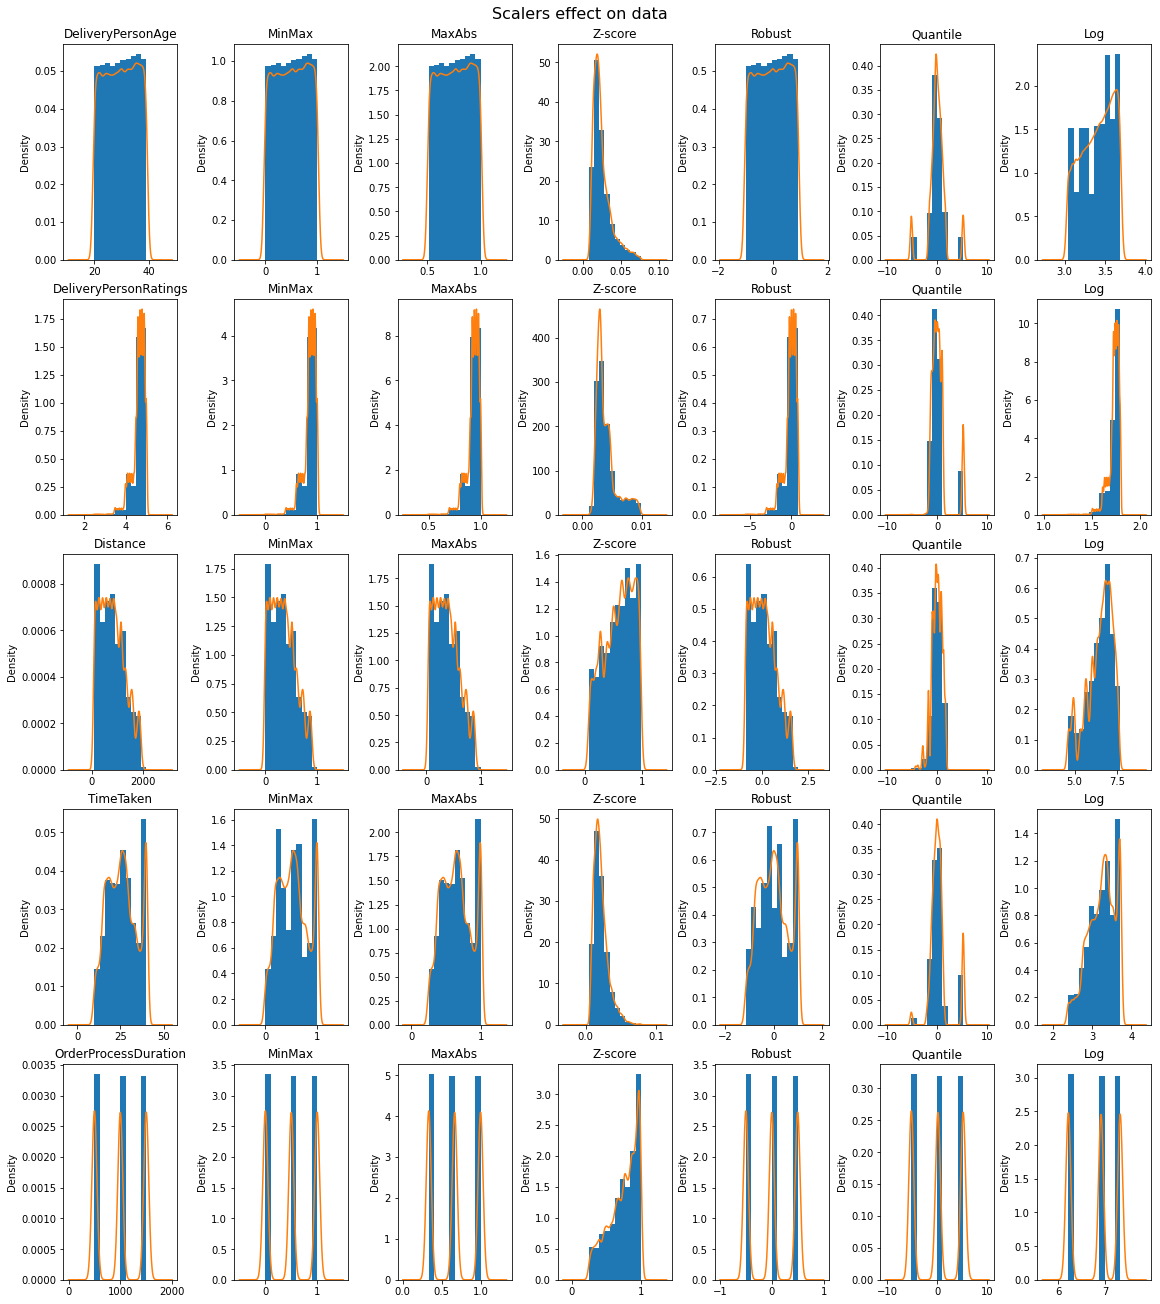

In [12]:
# Here we are comparing the effect of all the scaling techniques discussed on our dataset.

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer

val_cols_names = ['DeliveryPersonAge','DeliveryPersonRatings','Distance','TimeTaken', 'OrderProcessDuration']

def plot_histograms_density_for_scalers(df, columns, fig_title, scalers, scaler_names):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df[c].hist(ax=axs[i], density=True) # normalizes the density
        df[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df[val_cols_names])
            df_transformed = pd.DataFrame(df_transformed, index=df[val_cols_names].index, columns=df[val_cols_names].columns)
            df_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            df_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1
            
quantile_scaler = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
log_scaler = FunctionTransformer(np.log1p)
scaler_names = ['MinMax', 'MaxAbs', 'Z-score', 'Robust', 'Quantile', 'Log']
arr_scalers = [MinMaxScaler(), MaxAbsScaler(), Normalizer(), RobustScaler(), quantile_scaler, log_scaler]
plot_histograms_density_for_scalers(clean_df, val_cols_names, 'Scalers effect on data', arr_scalers, scaler_names)

<b> Raw Data, Initial analysis and guess on the right scaling to use: </b> 
<b> Before analysis the effect of different scaling on our dataset, we are making our initial guess with our raw data and the analysis is as follows: </b>
   
- Since the attribute 'DeliveryPersonRatings' have outliers present in them(which could be valid ones), we are required to choose a scaling that is robust to outliers. 
- Secondly, most of the atributes are skewed and expect for the attribute 'DeliveryPersonAge' none of them is close to Gaussian distribution.
- Since our data has uniform modal and close to bimodal in the attribute 'TimeTaken' and 'OrderProcessDuration'.
- Also we need our distribution close to normal/Gaussian for the use in our algorithm. So choosing <b>'Robust or Quantile Transformer'</b> to help with the outliers, skewed data, uniform , bimodal distribution and finally to transform our data close to normal distribution to work with our algorithms, as they perfom better with Gaussian Distribution.

<b> Applying all the discussed scaling techniques on our dataset and discussing their effect on our dataset </b>

- <b> MinMax Scalar: </b> The MinMax scalar has not affected the distribution of the data for all the attributes and has just scaled the values of the attributes between the values 0 and 1. Since we have removed the outliers, the scaling has not been affected. Even though the 'DeliveryPersonRatings' has extreme values present in them, the scaling still performs good.
- <b> MinAbs Scalar: </b> The MinAbs scalar has also not affected the distribution of the data for all the attributes and has just scaled the values of the attributes between the values 0 and 1, just like the above scalar, unaffected by extreme values.
- <b> Z-score: </b> For the attribute, 'DeliveryPersonAge', which earlier had close to normal distribution, the scalar has skewed the data. The attribute 'OrderProcessDuration' which has multimode model, the data has also been heavily skewed. The attribute 'Distance', the frequent values has been spread out, thus increasing the variance, moving the distribution close to normal. The other two attributes have also been skewed(earlier it was positivley skewed , applying the scaling moved to closer to negative)
- <b> Robust: </b> The distribition of all the attributes are preserved and has been unaffected by the presence of extreme values in 'DeliveryPersonRatings'.
- <b> Quantile: </b> After scaling our continuous attributes with the quantie transformer, we can see that they are close to having a Gaussian model. As we can see from the above figures, it has spread out the most frequent values in the attributes, making the distribution close to normal. For the multimode data in the attribute 'OrderProcessDuration' the scalar has just scaled the data and has retained the distribution.
- <b> Log: </b> The values in the attributes 'Distance' has been spread out and looks skewed. The attribute 'TimeTaken' has close to normal distribution once scaled by log. The shape remains unchanged for the attributes 'OrderProcessDuration' and 'DeliveryPersonRatings'. The attribute 'DeliveryPersonAge', the normal distribution has been affected and appreas to be skewed with multiple modes.  

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

quantile_scaler = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
log_scaler = FunctionTransformer(np.log1p)
scaler_names = ['MinMax', 'MaxAbs', 'Z-score', 'Robust', 'Quantile', 'Log']
arr_scalers = [MinMaxScaler(), MaxAbsScaler(), Normalizer(), RobustScaler(), quantile_scaler, log_scaler]
results = {}
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=3)

<h2> BASELINE STATERGY </h2>
Here we have the dataset called 'df' where we have the null values and the outliers present. We are replacing the null values and the outliers and storing them as another new dataset whose name is 'df1'.

<h3> MISSING DATA </h3>

- We have 2 attributes with missing values out of which one is a Categorical data.

- The two attributes with the missing data are the 'TimeTaken' and 'DeliveryPersonAge'. Since, there are no outliers present in either of these, we are choosing to fill the missing values with the 'Mean' of the attribute.

<h3> REPLACING OUTLIER VALUES </h3>

- Since the data is heavily skewed for the attributes 'Distance' and 'TimeTaken' we are replacing the outliers with the IQR.


In [57]:
# Replacing NaN values in the attributes - The Other two attributes with the missing data are the 'TimeTaken' and 'DeliveryPersonAge'. Since, there are no outliers present in either of these, we are choosing to fill the missing values with the 'Mean' of the attribute.

df1 = df['DeliveryPersonAge'].fillna(value=df['DeliveryPersonAge'].mean())
df1 = df['Distance'].fillna(value=df['Distance'].mean())


In [123]:
# Replacing outliers(using IQR) and replaced outliers are copied as part of new dataset 'df1'

val_cols_names = ['Distance','TimeTaken']

def replace_outliers_IQR(df, columns):
    for c in columns:
        q1=df[c].quantile(0.25)
        q3=df[c].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 1.5*iqr
        high_lim = q3 + 1.5*iqr
        print(f"High ({c}):", high_lim)
        print(f"Low ({c}):", low_lim)
        df[c] = np.where(df[c] >= high_lim, high_lim, np.where(df[c] <= low_lim, low_lim, df[c]))

df1 = df.copy()        
replace_outliers_IQR(df1, val_cols_names)

High (Distance): 2223.3684321516307
Low (Distance): -666.6425911597745
High (TimeTaken): 54.0
Low (TimeTaken): -2.0


We used a baseline stategery above to replace the values of null and outliers. Now we will use <b>'LinearRegression' and 'KNN' model</b> to predict and replace these values.

We have used the split and repeat in the <b>'RepeatedKFold'</b> to generate 30 estimates. 

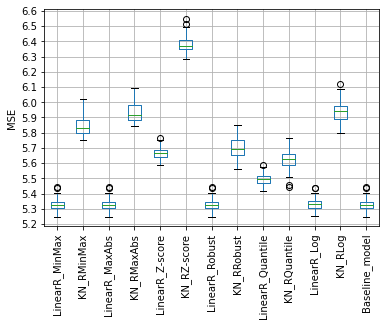

In [18]:
# We are predicting the 'neg_root_mean_squared_error' of the models 'Linear' and 'KNN' on our dataset.
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
for i in range (len(arr_scalers)):
    X = clean_df.copy()
    raw_data = clean_df.drop(['DeliveryPersonAge'], axis=1).to_numpy()
    X[val_cols_names] = arr_scalers[i].fit_transform(X[val_cols_names])
    X = pd.DataFrame(X, index=X.index, columns=X.columns)
    X = X.drop(['DeliveryPersonAge'], axis=1).to_numpy()
    y = clean_df['DeliveryPersonAge'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores1 = cross_val_score(model1, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    results['LinearR_'+scaler_names[i]] = [abs(elem) for elem in scores1]
    scores2 = cross_val_score(model2, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    results['KN_R'+scaler_names[i]] = [abs(elem) for elem in scores2]

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(model1, raw_data, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
results['Baseline_model'] = [abs(elem) for elem in scores]

df_res = pd.DataFrame(results)
boxplot = df_res.boxplot() 
boxplot.set_ylabel('MSE')
plt.xticks(rotation='vertical')
plt.locator_params(nbins=20, axis='y')
plt.show()

<b>DISCUSSION:</b> We see that the error rate is low for 'Linear Regression' and it performs good with almost all the scaling except for 'Quantile'. Although the performance is almost the same for all the other scaling, we found that the performace is consistent for 'Linear+Robust' across multiple iterations(when run multiple times). Also since we have extreme values in 'DeliverPersonRatings', we feel Robust will be a better fit.

In [59]:
model = LinearRegression()
X_train = clean_df.copy()
scaler =  RobustScaler()
val_cols_names = ['DeliveryPersonRatings','Distance','TimeTaken','OrderProcessDuration']
X_train[val_cols_names] = scaler.fit_transform(X_train[val_cols_names])
X_train = pd.DataFrame(X_train, index=X_train.index, columns=X_train.columns)
X_train = X_train.drop(['DeliveryPersonAge'], axis=1).to_numpy()
y_train = clean_df['DeliveryPersonAge'].to_numpy()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Predicting the null values for the column 'DeliveryPersonAge'
tdf = df.loc[:, df.columns != 'DeliveryPersonAge'].dropna().index
tdf = df[(df.index.isin(tdf))&(df.DeliveryPersonAge.isna())]
X_m = tdf.copy()
scaler =  RobustScaler()
#Scaling the continuous attributes
val_cols_names = ['DeliveryPersonRatings','Distance','TimeTaken','OrderProcessDuration']
X_m[val_cols_names] = scaler.fit_transform(X_m[val_cols_names])
X_m = pd.DataFrame(X_m, index=X_m.index, columns=X_m.columns)
X_m = X_m.drop(['DeliveryPersonAge'], axis=1).to_numpy()
#Predicting the value of DeliveryPersonAge using our trained model
predicted=model.predict(X_m)
predicted

array([31.4603298 , 28.54300403, 28.4196526 , ..., 27.04164137,
       34.39685656, 32.34053925])

In [62]:
# Here we are populating the predicted values in the attribute 'DeliveryPersonAge'
pdf = df.loc[:, df.columns != 'DeliveryPersonAge'].dropna().index
pdf = df[(df.index.isin(pdf))&(df['DeliveryPersonAge'].isna())]
pdf['DeliveryPersonAge'] = predicted
df = df[~(df.index.isin(pdf.index))]
df = pd.concat([df,pdf])
df

,DeliveryPersonAge,DeliveryPersonRatings,Distance,RoadTrafficDensity,VehicleCondition,TypeOfOrder,TypeOfVehicle,City,Festival,TimeTaken,OrderProcessDuration,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy
5115,38.000000,4.7,420.280569,2.0,0.0,1.0,1.0,0.768694,0.0,26.0,500.0,0.0,0.0,0.0,0.0,1.0,0.0
5117,35.000000,3.7,1592.285508,1.0,1.0,2.0,1.0,0.768694,0.0,36.0,1000.0,0.0,1.0,0.0,0.0,0.0,0.0
5118,33.000000,4.7,866.742809,4.0,0.0,1.0,1.0,0.768694,0.0,33.0,500.0,0.0,0.0,0.0,0.0,0.0,1.0
5119,34.000000,4.7,NaN,1.0,0.0,1.0,1.0,0.227709,0.0,23.0,1000.0,0.0,0.0,1.0,0.0,0.0,0.0
5120,35.000000,4.9,NaN,1.0,2.0,0.0,1.0,0.227709,0.0,19.0,1500.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,29.530324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5111,30.622252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5112,27.041641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5113,34.396857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
model = LinearRegression()
X_train = clean_df.copy()
scaler =  RobustScaler()
val_cols_names = ['DeliveryPersonRatings','DeliveryPersonAge','TimeTaken','OrderProcessDuration']
X_train[val_cols_names] = scaler.fit_transform(X_train[val_cols_names])
X_train = pd.DataFrame(X_train, index=X_train.index, columns=X_train.columns)
X_train = X_train.drop(['Distance'], axis=1).to_numpy()
y_train = clean_df['Distance'].to_numpy()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predicting the null values for the column 'Distance'
tdf = df.loc[:, df.columns != 'Distance'].dropna().index
tdf = df[(df.index.isin(tdf))&(df.Distance.isna())]
X_m = tdf.copy()
scaler =  RobustScaler()
#Scaling the continuous attributes
val_cols_names = ['DeliveryPersonRatings','DeliveryPersonAge','TimeTaken','OrderProcessDuration']
X_m[val_cols_names] = scaler.fit_transform(X_m[val_cols_names])
X_m = pd.DataFrame(X_m, index=X_m.index, columns=X_m.columns)
X_m = X_m.drop(['Distance'], axis=1).to_numpy()
#Predicting the value of Distance using our trained model
predicted=model.predict(X_m)
predicted

array([630.20073829, 645.69339786, 912.59833185, ..., 861.08171288,
       626.79060163, 817.04306506])

In [65]:
# Here we are populating the predicted values in the attribute 'Distance'
pdf = df.loc[:, df.columns != 'Distance'].dropna().index
pdf = df[(df.index.isin(pdf))&(df['Distance'].isna())]
pdf['Distance'] = predicted
df = df[~(df.index.isin(pdf.index))]
df = pd.concat([df,pdf])
df

,DeliveryPersonAge,DeliveryPersonRatings,Distance,RoadTrafficDensity,VehicleCondition,TypeOfOrder,TypeOfVehicle,City,Festival,TimeTaken,OrderProcessDuration,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy
5115,38.0,4.7,420.280569,2.0,0.0,1.0,1.0,0.768694,0.0,26.0,500.0,0.0,0.0,0.0,0.0,1.0,0.0
5117,35.0,3.7,1592.285508,1.0,1.0,2.0,1.0,0.768694,0.0,36.0,1000.0,0.0,1.0,0.0,0.0,0.0,0.0
5118,33.0,4.7,866.742809,4.0,0.0,1.0,1.0,0.768694,0.0,33.0,500.0,0.0,0.0,0.0,0.0,0.0,1.0
5121,33.0,4.7,1512.379119,4.0,2.0,2.0,2.0,0.768694,0.0,26.0,500.0,0.0,0.0,1.0,0.0,0.0,0.0
5125,21.0,4.6,512.729890,1.0,0.0,0.0,1.0,0.768694,0.0,24.0,500.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45567,33.0,4.7,666.425005,1.0,2.0,1.0,2.0,0.768694,0.0,19.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.0
45578,30.0,4.9,790.974090,1.0,1.0,3.0,1.0,0.768694,0.0,26.0,1500.0,0.0,0.0,0.0,0.0,0.0,1.0
45579,32.0,4.6,861.081713,2.0,2.0,1.0,2.0,0.768694,0.0,27.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.0
45584,37.0,4.8,626.790602,1.0,2.0,1.0,0.0,0.768694,0.0,20.0,1500.0,0.0,0.0,1.0,0.0,0.0,0.0


<b> Here we are predicting the aim of this project here which is to predict the 'TimeTaken' to deliver an order which is affected by all the other variables (discussed in the part1) of this dataset </b>

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics as sm

# we are scaling all our attributes with Robust Scaler
scaler = RobustScaler()
robust_tdf = scaler.fit_transform(clean_df)
robust_tdf = pd.DataFrame(robust_tdf, index=clean_df.index, columns=clean_df.columns)
X_robust = robust_tdf.to_numpy()
X_robust = X_robust.astype('int')
y_robust = robust_tdf['TimeTaken'].to_numpy()
y_robust = y_robust.astype('int')

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_robust, y_robust, test_size=0.20, random_state=0, stratify=y_robust)

# Training the model
model.fit(X_train, y_train)

# Testing the model
predictions = model.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, predictions), 2)) 
print("R2 score =", round(sm.r2_score(y_test, predictions), 2))


Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


<b>Here we have an r2 score that is 1.0 with 0 error rate, which means our model is performing very well in predicting our output. We have encoded all our categorical values, scaled our values and selected features to arrive at this result.</b> 